# Complex Networks Metrics Applied to Football Player Contracts Networks

### Balthazar Paixão

December 2022

### Assignment

#### In this assignment you must install and get familiar with the NetworkX library for network analysis. You must choose at least one network available in The Colorado Index of Complex Networks (ICON) repository (https://icon.colorado.edu/#!/), and characterize it using different metrics, such as degree, distance and clustering (you can choose the others). For each analyzed metric, calculate the following statistics: maximum, minimum, mean, standard deviation, and empirical distribution. Write a report discussing the obtained values. Submit the report in this assignment.


### Football Contracts (http://vlado.fmf.uni-lj.si/pub/networks/data/sport/football.net)

#### The chosen network is a complex network that represents 22 teams that participated in the 1998 Paris World Cup.

#### Players usually have contracts in other countries, which constitutes a market where national teams export players to other countries.

In [1]:
#libs imports

from random import sample
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# function to read the edges and vertex by: https://github.com/jvmaues

def load_graph(filename:str,
                  filename_label:str="../../data/football_contracts_labels.txt"):
    labels={}
    with open(filename_label, 'r') as f:
        for line in f:
            index, label= [x for x in line.split()]
            labels[int(index)] = label

    edges = []
    weights = []
    flag = True
    with open(filename, 'r') as f:
        for line in f:
            e1, e2, e3 = [int(x) for x in line.split()]
            
            edges.append((labels[e1], 
                          labels[e2]))
            weights.append(e3)
    return edges, weights

In [3]:
#Loading the graph
edges, weights = load_graph(filename="../../data/football_contracts_edgelist.txt")

G = nx.DiGraph()

for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1], weight=weights[i])

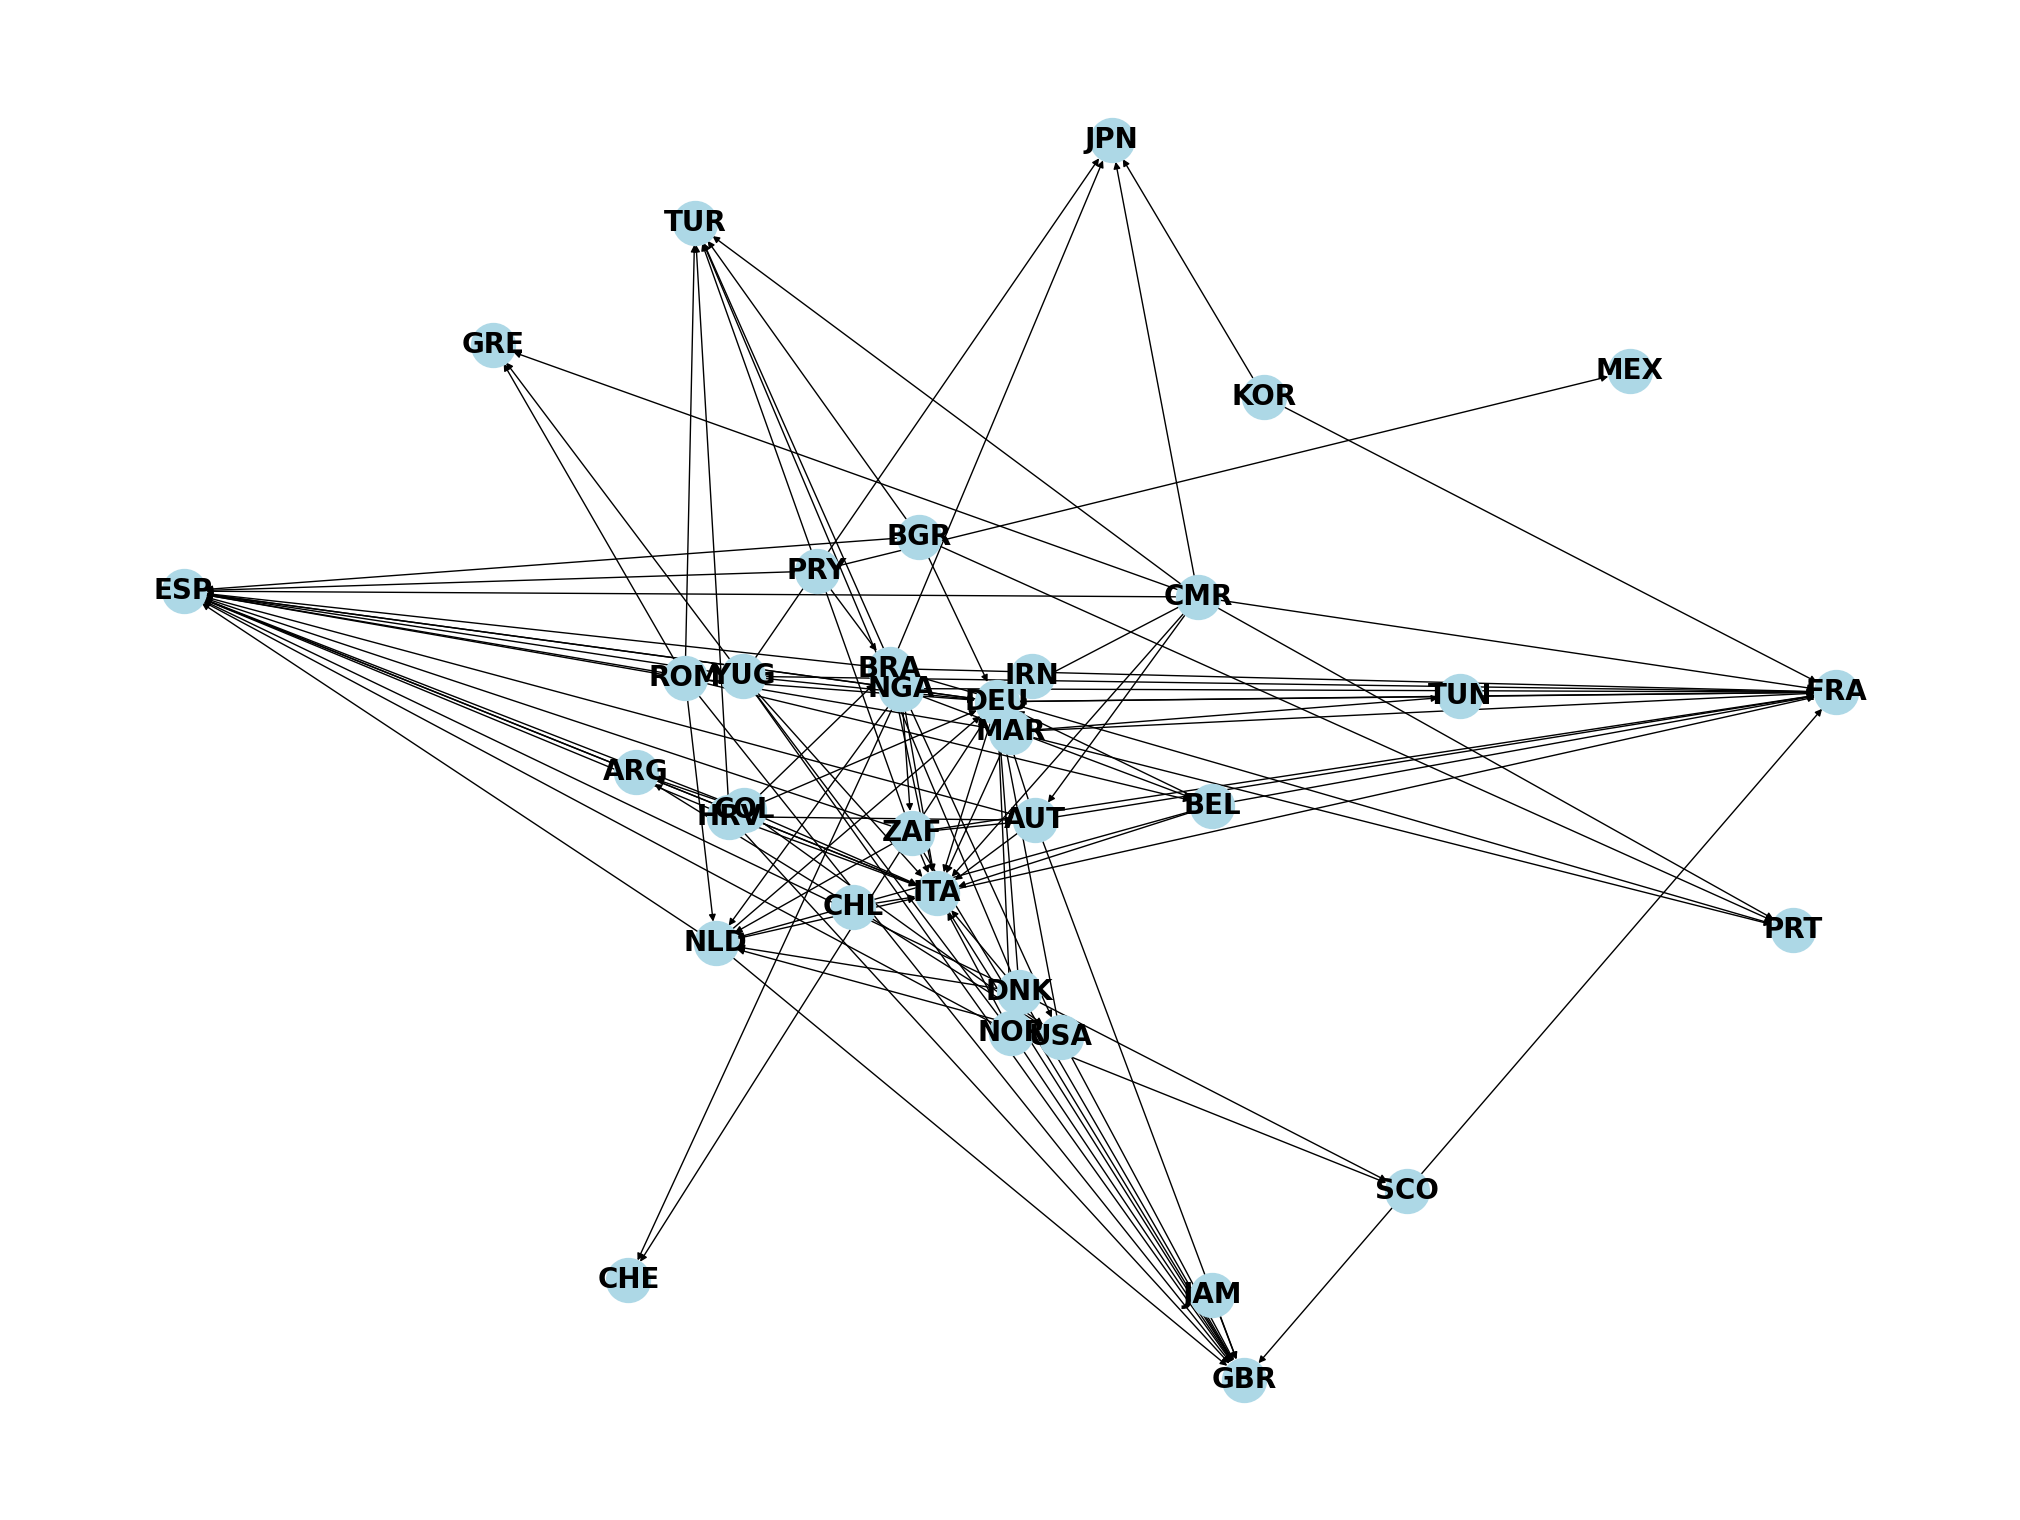

In [4]:
# Plotting the directed graph from the contries
plt.figure(figsize=(20, 15))

nx.draw(G,
        with_labels=True,
        font_weight='bold',
        node_size=1000,
        node_color='lightblue',
        font_size=20)
plt.draw()

## Network degree

In [5]:
print(f"Country with the highest degree -> {max(G.degree(), key=lambda x: x[1])}")
print(f"País com menor grau -> {min(G.degree(), key=lambda x: x[1])}")
print(f"Country with the lowest degree -> {min(G.degree(), key=lambda x: x[1])}")
print(f"Average degree -> {sum(dict(G.degree()).values())/len(G.nodes()):.5f}")
print(f"Standard deviation of degree -> {np.std(list(dict(G.degree()).values())):.5f}")
print()
print(f"Country with the highest in-degree -> {max(G.in_degree(), key=lambda x: x[1])}")
print(f"Country with the lowest in-degree -> {min(G.in_degree(), key=lambda x: x[1])}")
print(f"Average in-degree -> {sum(dict(G.in_degree()).values())/len(G.nodes()):.5f}")
print(f"Standard deviation of in-degree -> {np.std(list(dict(G.in_degree()).values())):.5f}")
print()
print(f"Country with the highest out-degree -> {max(G.out_degree(), key=lambda x: x[1])}")
print(f"Country with the lowest out-degree -> {min(G.out_degree(), key=lambda x: x[1])}")
print(f"Average out-degree -> {sum(dict(G.out_degree()).values())/len(G.nodes()):.5f}")
print(f"Standard deviation of out-degree -> {np.std(list(dict(G.out_degree()).values())):.5f}")
print()
print(f"Countries with in-degree equal to 0 -> {[x for x in G.nodes() if G.in_degree(x) == 0]}")
print(f"Countries with out-degree equal to 0 -> {[x for x in G.nodes() if G.out_degree(x) == 0]}")
print(f"Countries with in-degree above average -> {[x for x in G.nodes() if G.in_degree(x) > sum(dict(G.in_degree()).values())/len(G.nodes())]}")
print(f"Countries with out-degree above average -> {[x for x in G.nodes() if G.out_degree(x) > sum(dict(G.out_degree()).values())/len(G.nodes())]}")

Country with the highest degree -> ('ITA', 19)
País com menor grau -> ('IRN', 1)
Country with the lowest degree -> ('IRN', 1)
Average degree -> 6.74286
Standard deviation of degree -> 4.71073

Country with the highest in-degree -> ('ESP', 18)
Country with the lowest in-degree -> ('BGR', 0)
Average in-degree -> 3.37143
Standard deviation of in-degree -> 5.12186

Country with the highest out-degree -> ('NGA', 10)
Country with the lowest out-degree -> ('ESP', 0)
Average out-degree -> 3.37143
Standard deviation of out-degree -> 2.88925

Countries with in-degree equal to 0 -> ['BGR', 'CHL', 'CMR', 'COL', 'DNK', 'HRV', 'IRN', 'JAM', 'KOR', 'MAR', 'NGA', 'NOR', 'PRY', 'ROM', 'YUG']
Countries with out-degree equal to 0 -> ['ESP', 'FRA', 'GBR', 'PRT', 'TUR', 'JPN', 'GRE', 'CHE', 'MEX']
Countries with in-degree above average -> ['ESP', 'ITA', 'DEU', 'FRA', 'GBR', 'NLD', 'PRT', 'TUR', 'JPN']
Countries with out-degree above average -> ['AUT', 'BEL', 'NLD', 'BGR', 'BRA', 'CMR', 'COL', 'DNK', 'HRV',

About the degree, we can observe that Italy is the country with the highest degree where, out of a total of 19, 16 are imported players and 3 are exported.

Nigeria is the country that exports the most players, with players exported to 10 different countries.

The country with the lowest degree is Iran, where only 1 player is exported.

Countries with entry degree equal to 0 correspond to countries that only export players, while countries with exit degree equal to 0 correspond to countries that only import players.

Spain is the country with the highest entry degree and does not export any players. Germany and Italy follow with 16 imported players.

## Clustering

In [6]:
print(f"Country with the highest clustering -> {max(nx.clustering(G), key=lambda x: nx.clustering(G)[x])}")
print(f"Country with the lowest clustering -> {min(nx.clustering(G), key=lambda x: nx.clustering(G)[x])}")
print(f"Average clustering -> {nx.average_clustering(G):.5f}")
print(f"Standard deviation of clustering -> {np.std(list(nx.clustering(G).values())):.5f}")
print()
print(f"Country with the highest closeness centrality -> {max(nx.closeness_centrality(G), key=lambda x: nx.closeness_centrality(G)[x])}")
print(f"Country with the lowest closeness centrality -> {min(nx.closeness_centrality(G), key=lambda x: nx.closeness_centrality(G)[x])}")
print(f"Average closeness centrality -> {sum(nx.closeness_centrality(G).values())/len(G.nodes()):.5f}")
print(f"Standard deviation of closeness centrality -> {np.std(list(nx.closeness_centrality(G).values())):.5f}")
print()
print(f"Country with the highest betweenness centrality -> {max(nx.betweenness_centrality(G), key=lambda x: nx.betweenness_centrality(G)[x])}")
print(f"Country with the lowest betweenness centrality -> {min(nx.betweenness_centrality(G), key=lambda x: nx.betweenness_centrality(G)[x])}")
print(f"Average betweenness centrality -> {sum(nx.betweenness_centrality(G).values())/len(G.nodes()):.5f}")
print(f"Standard deviation of betweenness centrality -> {np.std(list(nx.betweenness_centrality(G).values())):.5f}")


Country with the highest clustering -> TUN
Country with the lowest clustering -> PRT
Average clustering -> 0.16949
Standard deviation of clustering -> 0.13134

Country with the highest closeness centrality -> ESP
Country with the lowest closeness centrality -> BGR
Average closeness centrality -> 0.10819
Standard deviation of closeness centrality -> 0.16734

Country with the highest betweenness centrality -> ITA
Country with the lowest betweenness centrality -> ESP
Average betweenness centrality -> 0.00125
Standard deviation of betweenness centrality -> 0.00326


## Hubs

In [7]:
hubs, authorities = nx.hits(G)

print(f"Contry with the highest hub -> {max(authorities, key=lambda x: hubs[x])}")
print(f"Country with the lowest hub -> {min(authorities, key=lambda x: hubs[x])}")
print(f"Average hub -> {sum(hubs.values())/len(hubs.values()):.5f}")
print(f"Standard deviation of hubs -> {np.std(list(hubs.values())):.5f}")
print(f"Countries with hub above average -> {[x for x in G.nodes() if hubs[x] > sum(hubs.values())/len(hubs.values())]}")

Contry with the highest hub -> YUG
Country with the lowest hub -> ESP
Average hub -> 0.02857
Standard deviation of hubs -> 0.02700
Countries with hub above average -> ['ARG', 'AUT', 'NLD', 'BRA', 'CMR', 'DNK', 'SCO', 'HRV', 'JAM', 'MAR', 'NGA', 'ZAF', 'NOR', 'ROM', 'YUG']


## Authorities

In [8]:
print(f"Country with the highest authority -> {max(authorities, key=lambda x: authorities[x])}")
print(f"Country with the lowest authority -> {min(authorities, key=lambda x: authorities[x])}")
print(f"Average authority -> {sum(authorities.values())/len(authorities.values()):.5f}")
print(f"Standard deviation of authority -> {np.std(list(authorities.values())):.5f}")
print(f"Countries with authority above average -> {[x for x in G.nodes() if authorities[x] > sum(authorities.values())/len(authorities.values())]}")

Country with the highest authority -> ESP
Country with the lowest authority -> ROM
Average authority -> 0.02857
Standard deviation of authority -> 0.05600
Countries with authority above average -> ['ESP', 'ITA', 'DEU', 'FRA', 'GBR', 'NLD', 'TUR', 'SCO']


Hubs and Authorities are centrality measures that measure the importance of a node in a graph. Hubs are nodes that have many incoming edges, while Authorities are nodes that have many outgoing edges. The importance of a node is measured by the sum of the weights of the edges incident on it.

In this case the authorities correspond to the countries that have the best leagues, as they are the countries that export the most players. The hubs correspond to the countries that have the best players, as they are the countries that import the most players.

In [9]:
degrees_list = []
clusters_list =[]
hubs_list = []
authorities_list = []
in_list = []
out_list = []

for key in hubs.keys():
    degrees_list.append(G.degree(key))
    clusters_list.append(nx.clustering(G)[key])
    hubs_list.append(hubs[key])
    authorities_list.append(authorities[key])
    in_list.append(G.in_degree(key))
    out_list.append(G.out_degree(key))
    


In [10]:
df = pd.DataFrame({'Degrees': degrees_list, 
                   'Clustering': clusters_list,
                   'Hubs': hubs_list,
                   'Authorities': authorities_list,
                   'In': in_list,
                   'Out': out_list},
                   index=hubs.keys())
df = df.sort_index()

In [11]:
df

,Degrees,Clustering,Hubs,Authorities,In,Out
ARG,4,0.333333,0.064275,2.736365e-03,2,2
AUT,8,0.339286,0.039331,1.076864e-02,3,5
BEL,6,0.366667,0.020255,1.100491e-02,2,4
BGR,4,0.083333,0.025289,5.281582e-18,0,4
BRA,7,0.119048,0.048919,1.199815e-02,2,5
CHE,2,0.500000,-0.000000,7.043780e-03,2,0
CHL,3,0.166667,0.004763,-2.045106e-18,0,3
CMR,9,0.125000,0.041936,6.284994e-18,0,9
COL,5,0.250000,0.011551,5.302042e-18,0,5
DEU,19,0.137427,0.016583,1.152023e-01,16,3
